# 1. Importing Libraries and Datasets

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [15]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [16]:
#path

path = r'C:\Users\Lucero\Documents\Adidas US Sales'

In [17]:
#import data

df = pd.read_csv(os.path.join(path,'Adidas Prepared Data','Sales_cleaned(2).csv'), index_col = False)

In [18]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,0.28,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,0.32,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,0.37,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,0.42,Outlet


In [19]:
# Removing all categorical variables

df.drop(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City', 'Product', 'Sales Method'], axis = 1, inplace = True)

In [20]:
df

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,50,1200,600000,300000,0.50
1,50,1000,500000,150000,0.30
2,40,1000,400000,140000,0.35
3,45,850,382500,133875,0.35
4,60,900,540000,162000,0.30
...,...,...,...,...,...
9643,50,64,3200,896,0.28
9644,41,105,4305,1378,0.32
9645,41,184,7544,2791,0.37
9646,42,70,2940,1235,0.42


# 2. The elbow technique

In [21]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [22]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

C:\Users\Lucero\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lucero\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lucero\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lucero\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lucero\anaconda3\lib\site-packages\sklearn\

[-222624751169558.4,
 -58094556256738.26,
 -25608350356110.223,
 -15445188497710.652,
 -10353620803332.082,
 -7785877577643.46,
 -6074361795061.262,
 -5129054177959.63,
 -4478030069459.622]

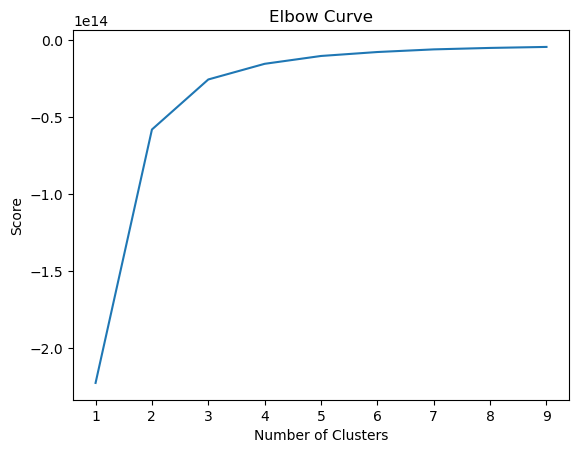

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 3. K-means clustering

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,) 

In [25]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Lucero\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

C:\Users\Lucero\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
df.head()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,clusters
0,50,1200,600000,300000,0.50,1
1,50,1000,500000,150000,0.30,1
2,40,1000,400000,140000,0.35,1
3,45,850,382500,133875,0.35,1
4,60,900,540000,162000,0.30,1


In [28]:
df['clusters'].value_counts()

0    6744
2    2058
1     846
Name: clusters, dtype: int64

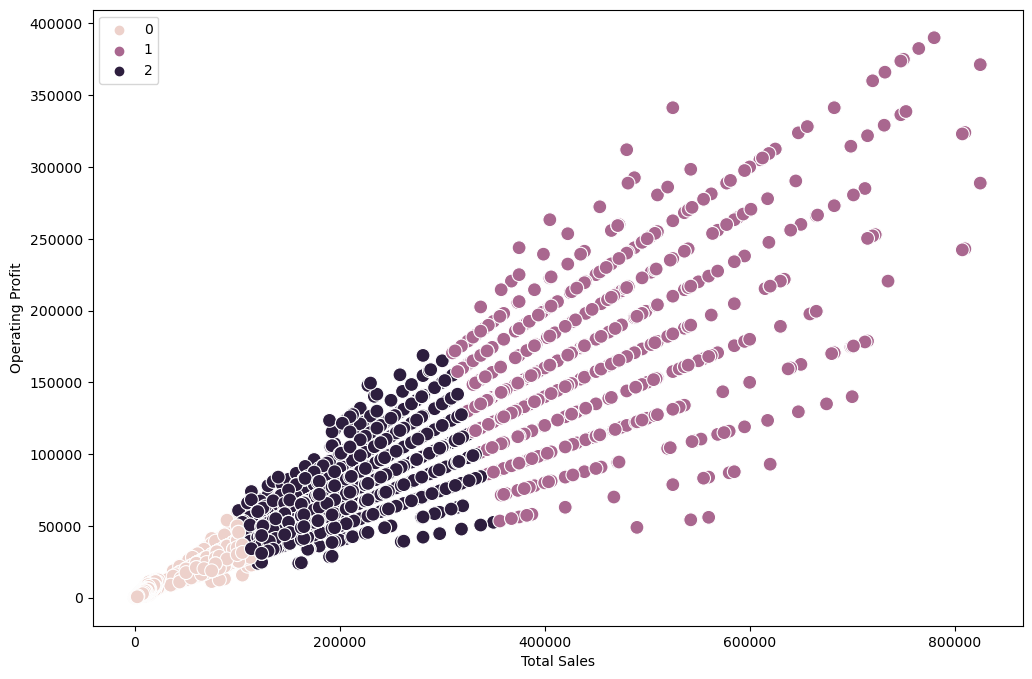

In [29]:
# Plot the clusters for the "Operating Profit" and "Total Sales" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Total Sales'], y = df['Operating Profit'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')
plt.show()

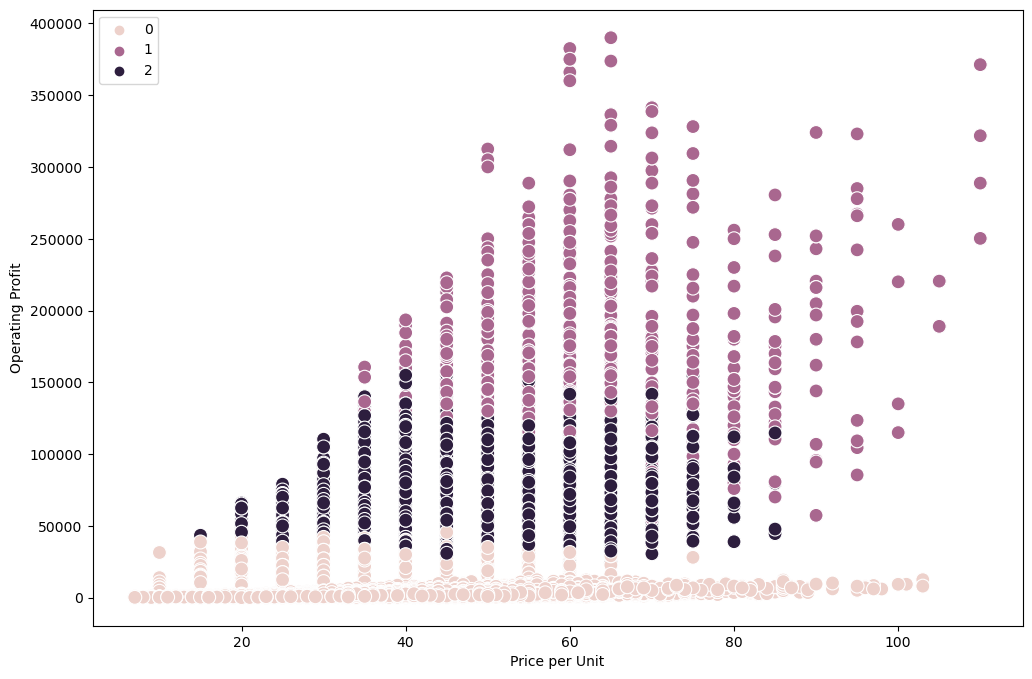

In [30]:
# Plot the clusters for the "Operating Profit" and "Price per Unit" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Price per Unit'], y = df['Operating Profit'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Price per Unit')
plt.ylabel('Operating Profit')
plt.show()

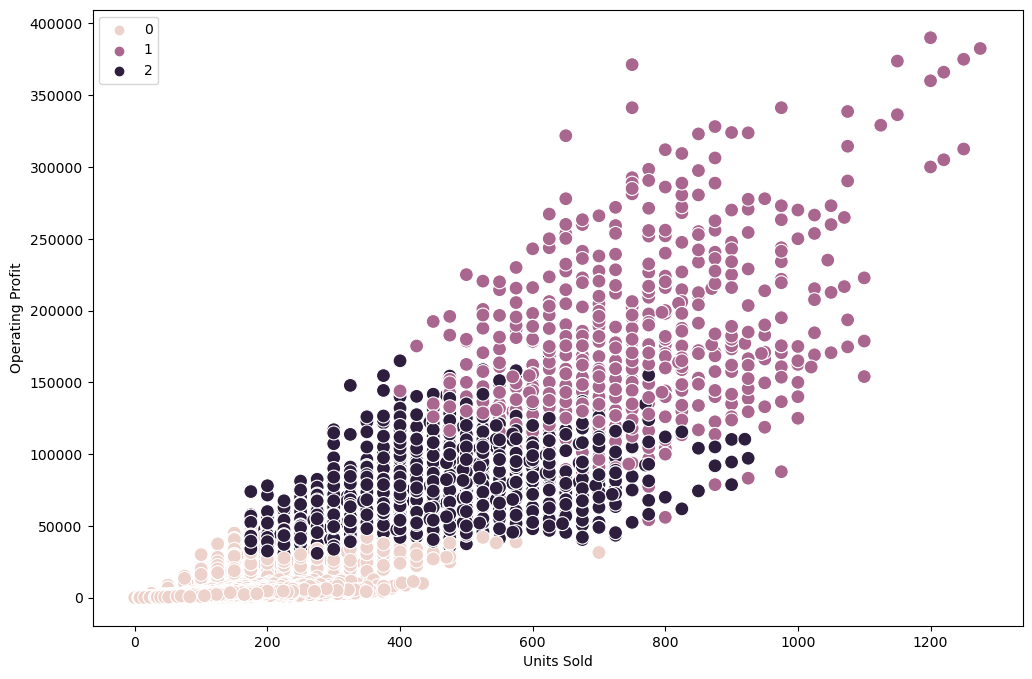

In [31]:
# Plot the clusters for the "Operating Progit" and "Units Sold" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Units Sold'], y = df['Operating Profit'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Units Sold')
plt.ylabel('Operating Profit')
plt.show()

# 4. Observations


For the most part, the purple group (group 1) has performed the best in all three situations.
The Operating Profit vs. Total Sales chart has split the groups quite nicely, showing that with higher Total Sales, Operating Profit also increases.
The Operating Profit vs. Unit Price chart shows that the dark purple group is not represented in price above $85.
The Units Sold vs. Operating Profit graph appears to have some overlapping values in dark purple and purple groups, which could mean that some items are not making as much profit even if sold in higher quantities.


# 5. Descriptive statistics

In [32]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
df.groupby('cluster').agg({'Total Sales':['mean', 'median'], 
                         'Price per Unit':['mean', 'median'], 
                         'Units Sold':['mean', 'median'],
                          'Operating Profit':['mean', 'median']})

Total Sales           Price per Unit         Units Sold         \
                      mean    median           mean median        mean median   
cluster                                                                         
dark purple  202416.059281  195000.0      48.542274   50.0  432.896016  425.0   
pink          15173.765569    5839.0      42.038849   41.0  143.091785  133.0   
purple       450352.245863  425000.0      62.458629   60.0  736.347518  725.0   

            Operating Profit            
                        mean    median  
cluster                                 
dark purple     73392.640428   70000.0  
pink             5896.094751    2657.5  
purple         167056.507092  157500.0

# 6. Next steps

The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. It would maybe provide a more holistic view on what in fact influences the Operating Profit variable.